In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from io import BytesIO
import requests
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [ ]:
def load_imdb_dataset(extract_path="../../data", overwrite=False):
    #check if existed already
    if os.path.isfile(os.path.join(extract_path, "aclImdb", "README")) and not overwrite:
        print("IMDB dataset is already in place.")
        return
    
    print("Downloading the dataset from:  ", url)
    response = requests.get(url)
    
    tar = tarfile.open(mode= "r:gz", fileobj = BytesIO(response.content))
    
    data = tar.extractall(extract_path)
    
load_imdb_dataset()

In [ ]:
PATH_TO_IMDB = "../../data/aclImdb"

reviews_train = load_files(os.path.join(PATH_TO_IMDB, "train"),
                           categories=['pos', 'neg'])

In [ ]:
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(os.path.join(PATH_TO_IMDB, "test"),
                          categories=['pos', 'neg'])
text_test, y_test = reviews_test.data, reviews_test.target

In [ ]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

In [ ]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

In [ ]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

In [ ]:

X_train = cv.transform(text_train)
X_train

In [ ]:

print(text_train[19725])

In [ ]:

X_train.shape

In [ ]:

X_test = cv.transform(text_test)

In [ ]:

%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

In [ ]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3)

In [ ]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [ ]:

def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();

In [ ]:

visualize_coefficients(logit, cv.get_feature_names())

In [ ]:

%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(),
                                LogisticRegression(solver='lbfgs', 
                                                   n_jobs=1,
                                                   random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

In [ ]:

%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, 
                          param_grid_logit, 
                          return_train_score=True, 
                          cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

In [ ]:

grid_logit.best_params_, grid_logit.best_score_

In [ ]:
plot_grid_scores(grid_logit, 'logisticregression__C')

In [ ]:

grid_logit.score(text_test, y_test)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:

forest = RandomForestClassifier(n_estimators=200, 
                                n_jobs=-1, random_state=17)

In [ ]:

%%time
forest.fit(X_train, y_train)

In [ ]:
round(forest.score(X_test, y_test), 3)

In [ ]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)

In [ ]:
X[0]

In [ ]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [ ]:
xor = np.logical_xor(1,0)

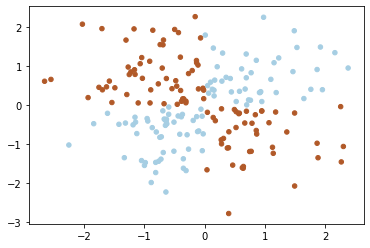

In [61]:

plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap=plt.cm.Paired);

In [62]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline